<a id='intro'></a>
## Ford Go Bike Dataset Analysis 

Import Libraries 

In [215]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from requests import get
from zipfile import ZipFile
from io import StringIO, BytesIO
import seaborn as sb
%matplotlib inline

Read Data file

In [157]:
#read csv file
df = pd.read_csv('201806-fordgobike-tripdata.csv')


<a id='intro'></a>
## Data Assesment

In [158]:
#use sample() to check the data set coulmn 
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
35280,747,2018-06-26 07:31:58.5930,2018-06-26 07:44:26.2730,321.0,5th at Folsom,37.780146,-122.403071,58.0,Market St at 10th St,37.776619,-122.417385,1180,Subscriber,No
6705,589,2018-06-29 17:15:00.6200,2018-06-29 17:24:49.9450,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1730,Subscriber,No
168145,1020,2018-06-05 15:54:04.1080,2018-06-05 16:11:04.3020,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,75.0,Market St at Franklin St,37.773793,-122.421239,586,Subscriber,No
43300,157,2018-06-25 06:41:50.6600,2018-06-25 06:44:28.6040,50.0,2nd St at Townsend St,37.780526,-122.390288,81.0,Berry St at 4th St,37.775880,-122.393170,3906,Subscriber,No
17887,249,2018-06-28 09:17:53.5560,2018-06-28 09:22:03.3350,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,245.0,Downtown Berkeley BART,37.870348,-122.267764,508,Subscriber,No
163422,459,2018-06-06 08:32:25.5260,2018-06-06 08:40:04.7120,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,64.0,5th St at Brannan St,37.776754,-122.399018,156,Subscriber,No
43806,371,2018-06-24 20:23:49.2620,2018-06-24 20:30:00.8770,167.0,College Ave at Harwood Ave,37.848152,-122.252160,206.0,College Ave at Bryant Ave,37.838127,-122.251271,308,Subscriber,Yes
187021,2734,2018-06-02 13:22:10.7950,2018-06-02 14:07:45.4580,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,53.0,Grove St at Divisadero,37.775946,-122.437777,3985,Subscriber,Yes
81212,540,2018-06-19 08:50:01.4420,2018-06-19 08:59:01.9170,250.0,North Berkeley BART Station,37.874014,-122.283019,244.0,Shattuck Ave at Hearst Ave,37.873792,-122.268618,1349,Subscriber,No
156791,1225,2018-06-07 06:55:15.2540,2018-06-07 07:15:40.4730,19.0,Post St at Kearny St,37.788975,-122.403452,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1195,Subscriber,No


In [159]:
# use shape to know the numbers of clomn and rows 
df.shape

(195968, 14)

In [160]:
#use info to check data types and number of entries 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195968 entries, 0 to 195967
Data columns (total 14 columns):
duration_sec               195968 non-null int64
start_time                 195968 non-null object
end_time                   195968 non-null object
start_station_id           193907 non-null float64
start_station_name         193907 non-null object
start_station_latitude     195968 non-null float64
start_station_longitude    195968 non-null float64
end_station_id             193907 non-null float64
end_station_name           193907 non-null object
end_station_latitude       195968 non-null float64
end_station_longitude      195968 non-null float64
bike_id                    195968 non-null int64
user_type                  195968 non-null object
bike_share_for_all_trip    195968 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 20.9+ MB


In [161]:
#Number of Customer and Subscriber 
df['user_type'].value_counts()

Subscriber    163085
Customer       32883
Name: user_type, dtype: int64

In [162]:
# Nmaes of Start station
df['start_station_name'].value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)                 4099
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3921
Berry St at 4th St                                                 3871
San Francisco Caltrain (Townsend St at 4th St)                     3722
The Embarcadero at Sansome St                                      3676
Montgomery St BART Station (Market St at 2nd St)                   3636
Market St at 10th St                                               3604
Powell St BART Station (Market St at 4th St)                       3257
Steuart St at Market St                                            3070
3rd St at Townsend St                                              2767
Howard St at Beale St                                              2719
Powell St BART Station (Market St at 5th St)                       2711
2nd St at Townsend St                                              2402
Embarcadero BART Station (Beale St at Market St)                

In [163]:
#Name of End stations 
df['end_station_name'].value_counts()




San Francisco Caltrain Station 2  (Townsend St at 4th St)          5126
San Francisco Ferry Building (Harry Bridges Plaza)                 4726
The Embarcadero at Sansome St                                      4355
San Francisco Caltrain (Townsend St at 4th St)                     4338
Montgomery St BART Station (Market St at 2nd St)                   3837
Berry St at 4th St                                                 3654
Market St at 10th St                                               3610
Powell St BART Station (Market St at 4th St)                       3368
Steuart St at Market St                                            3063
Powell St BART Station (Market St at 5th St)                       2826
3rd St at Townsend St                                              2730
Howard St at Beale St                                              2621
2nd St at Townsend St                                              2442
Embarcadero BART Station (Beale St at Market St)                

In [164]:
#Check for any Duplication
df.duplicated().sum()

0




<a id='intro'></a>
## Data Cleaning

Create a Copy of dataset

In [165]:
#Copying df 
df_clean = df.copy()

Change Type of start_station_name,end_station_namemuser_type to String

In [166]:
#change types
df_clean['start_station_name'] = df_clean['start_station_name'].astype(str)
df_clean['end_station_name'] = df_clean['end_station_name'].astype(str)
df_clean['user_type'] = df_clean['user_type'].astype(str)

 

In [167]:
#Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195968 entries, 0 to 195967
Data columns (total 14 columns):
duration_sec               195968 non-null int64
start_time                 195968 non-null object
end_time                   195968 non-null object
start_station_id           193907 non-null float64
start_station_name         195968 non-null object
start_station_latitude     195968 non-null float64
start_station_longitude    195968 non-null float64
end_station_id             193907 non-null float64
end_station_name           195968 non-null object
end_station_latitude       195968 non-null float64
end_station_longitude      195968 non-null float64
bike_id                    195968 non-null int64
user_type                  195968 non-null object
bike_share_for_all_trip    195968 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 20.9+ MB




Claculate The Distance useing latitude and longitude    

In [168]:
#Calculte Distance in km 

#import math library 
import math
from math import radians, sin, cos, acos

#define distance 
def distance(origin, destination):

    Flat, Flong = origin
    Slat, Slong = destination
    radius = 6371
    a = (math.sin(math.radians(Slat - Flat) / 2) * math.sin(math.radians(Slat - Flat) / 2) + math.cos(math.radians(Flat)) * math.cos(math.radians(Slat)) * math.sin(math.radians(Slong - Flong) / 2) * math.sin(math.radians(Slong - Flong) / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [169]:
#add a new distance coulmn 
df_clean['distance'] = df_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)
# Convert type to int 
df_clean['distance'] = df_clean['distance'].astype(int)


Split the start time into month , day ,hour 

In [170]:
#Convert Start time to datatime
df_clean.start_time = pd.to_datetime(df_clean.start_time)
#create month name cloumn
df_clean['start_time_month'] = df_clean['start_time'].dt.strftime('%B')
#create month number cloumn
df_clean['start_time_month_num'] = df_clean['start_time'].dt.month.astype(int)
#create day name cloumn
df_clean['start_time_weekday'] = df_clean['start_time'].dt.strftime('%a')
#create day number cloumn
df_clean['start_time_weekday_num'] = df_clean['start_time'].dt.day.astype(int)
#create hour number cloumn
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour


In [171]:
#Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195968 entries, 0 to 195967
Data columns (total 20 columns):
duration_sec               195968 non-null int64
start_time                 195968 non-null datetime64[ns]
end_time                   195968 non-null object
start_station_id           193907 non-null float64
start_station_name         195968 non-null object
start_station_latitude     195968 non-null float64
start_station_longitude    195968 non-null float64
end_station_id             193907 non-null float64
end_station_name           195968 non-null object
end_station_latitude       195968 non-null float64
end_station_longitude      195968 non-null float64
bike_id                    195968 non-null int64
user_type                  195968 non-null object
bike_share_for_all_trip    195968 non-null object
distance                   195968 non-null int32
start_time_month           195968 non-null object
start_time_month_num       195968 non-null int32
start_time_weekday         19

In [172]:
#check dataset using sample
df_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance,start_time_month,start_time_month_num,start_time_weekday,start_time_weekday_num,start_time_hour
94123,539,2018-06-16 21:58:15.025,2018-06-16 22:07:14.5050,92.0,Mission Bay Kids Park,37.772301,-122.393027,78.0,Folsom St at 9th St,37.773717,-122.411647,3846,Subscriber,No,1,June,6,Sat,16,21
185520,623,2018-06-02 17:30:24.147,2018-06-02 17:40:47.9010,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,75.0,Market St at Franklin St,37.773793,-122.421239,4003,Subscriber,No,2,June,6,Sat,2,17
39499,385,2018-06-25 15:58:18.498,2018-06-25 16:04:43.9200,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,3796,Subscriber,No,0,June,6,Mon,25,15
17084,1207,2018-06-28 10:33:19.018,2018-06-28 10:53:26.8320,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,92.0,Mission Bay Kids Park,37.772301,-122.393027,750,Subscriber,No,2,June,6,Thu,28,10
189303,1805,2018-06-01 21:19:38.235,2018-06-01 21:49:44.0190,254.0,Vine St at Shattuck Ave,37.880222,-122.269592,249.0,Russell St at College Ave,37.858473,-122.253253,3561,Subscriber,No,2,June,6,Fri,1,21
21599,1613,2018-06-27 17:59:45.461,2018-06-27 18:26:38.8020,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,120.0,Mission Dolores Park,37.761420,-122.426435,3794,Subscriber,No,5,June,6,Wed,27,17
155721,499,2018-06-07 08:46:33.213,2018-06-07 08:54:52.7380,305.0,Ryland Park,37.342725,-121.895617,280.0,San Fernando at 7th St,37.337246,-121.883074,623,Subscriber,Yes,1,June,6,Thu,7,8
174497,239,2018-06-04 17:54:07.540,2018-06-04 17:58:07.3370,314.0,Santa Clara St at Almaden Blvd,37.333988,-121.894902,309.0,San Jose City Hall,37.337391,-121.886995,1915,Subscriber,No,0,June,6,Mon,4,17
61034,7171,2018-06-21 18:16:32.451,2018-06-21 20:16:03.9810,14.0,Clay St at Battery St,37.795001,-122.399970,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,1588,Customer,No,2,June,6,Thu,21,18
91515,328,2018-06-17 17:14:31.454,2018-06-17 17:19:59.6120,133.0,Valencia St at 22nd St,37.755213,-122.420975,109.0,17th St at Valencia St,37.763316,-122.421904,1527,Subscriber,No,0,June,6,Sun,17,17


<a id='intro'></a>
## Univariate Exploration

Question:What is the average trip durtion and what is the highiest and the lowest duration?.

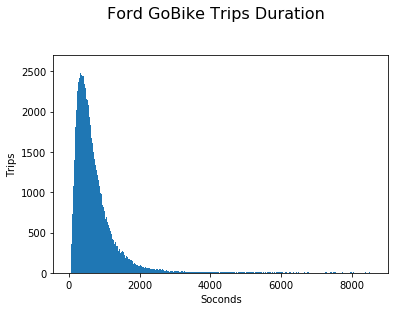

In [173]:
#Determine the range of th x axes
bins = np.arange( 0, 8600,10)
#determine the values of the data and x axes 
plt.hist(data = df_clean, x = 'duration_sec', bins = bins);
#Determine Label for x and y exes 
plt.xlabel('Soconds')
plt.ylabel('Trips');

#Determine the title 
plt.suptitle('Ford GoBike Trips Duration', y=1.05, fontsize=16);

In [174]:
df_clean['duration_sec'].describe()

count    195968.000000
mean        907.748439
std        2642.666562
min          61.000000
25%         351.000000
50%         564.000000
75%         896.000000
max       85278.000000
Name: duration_sec, dtype: float64

Opservation:Most Trip take about 1000 second

Question:What is the average Distance durtion and what is the lognest and the shortest Distance ?.

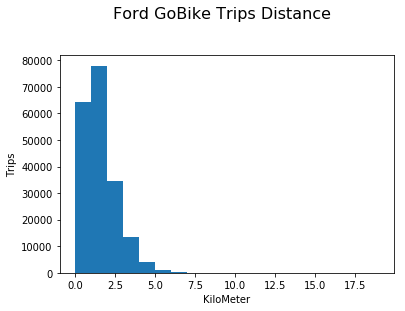

In [175]:
#Determine the range of the x axes
bin_edges = np.arange(0, 20, 1)
#Determine the values of thedata and the x axes
plt.hist(data = df_clean, x = 'distance', bins = bin_edges);
#Determine the labels of the y and  x axes
plt.xlabel('KiloMeter')
plt.ylabel('Trips');
#Determine the title 
plt.suptitle('Ford GoBike Trips Distance', y=1.05, fontsize=16);

In [176]:
df_clean['distance'].describe()

count    195968.000000
mean          1.085034
std           1.065518
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          14.000000
Name: distance, dtype: float64

Opservation:Most Trip take about 1 Km

Question:What is the day of the week with the most bike trips and what is the day with the lowest?.

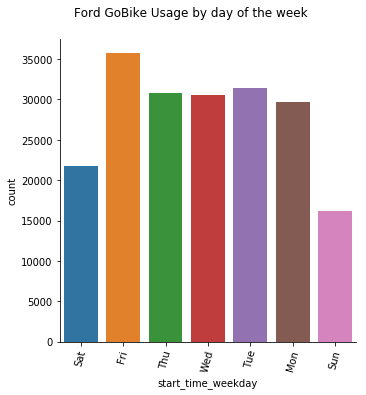

In [177]:
# Determine data values and x axes 
plt = sb.catplot(data=df_clean, x='start_time_weekday', kind='count')

#Determine the title 
plt.fig.suptitle('Ford GoBike Usage by day of the week', y=1.05);
plt.set_xticklabels(rotation=75);

In [178]:
 df_clean['start_time_weekday'].value_counts()

Fri    35717
Tue    31433
Thu    30822
Wed    30539
Mon    29622
Sat    21718
Sun    16117
Name: start_time_weekday, dtype: int64

Opservation:Friday Has the largest number od trips while sunday has the lowest number

Question:What is the day of the month with the most bike trips and what is the day with the lowest?.

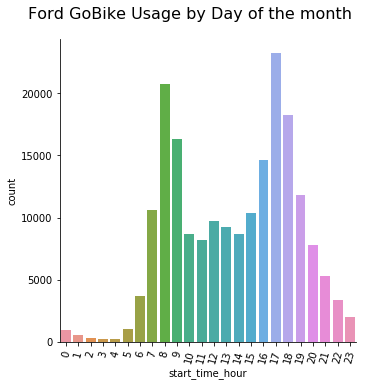

In [179]:
# Determine data values and x axes 
graph = sb.catplot(data=df_clean, x='start_time_hour', kind='count')
#Determine the title 
graph.fig.suptitle('Ford GoBike Usage by Day of the month', y=1.05, fontsize=16);
graph.set_xticklabels(rotation=75);

In [180]:
 df_clean['start_time_hour'].value_counts()

17    23200
8     20761
18    18235
9     16314
16    14668
19    11807
7     10614
15    10340
12     9704
13     9227
10     8699
14     8662
11     8166
20     7811
21     5293
6      3660
22     3361
23     2021
5      1061
0       982
1       561
2       345
4       264
3       212
Name: start_time_hour, dtype: int64

Opservation:17 Has the largest number od trips while 3 and 4 has the lowest number of trips. 

<a id='intro'></a>
## Bivariate Exploration

Question:Which user type takes the most trips ?.

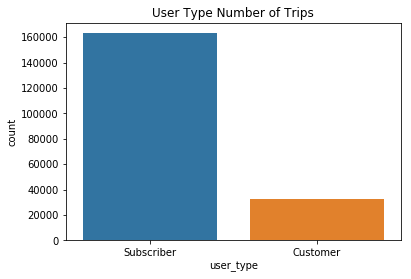

In [196]:
#Determine the value of the data and the title 
plt = sb.countplot(data = df_clean, x = "user_type", order = df_clean.user_type.value_counts().index).set_title('User Type Number of Trips');



Opservation:Subscriber has higher number of trips 

Question:Dose Sharing Buke option is more popular ?.

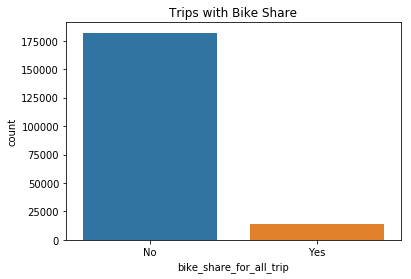

In [200]:
#Determine the value of the data and the title 
graph = sb.countplot(data = df_clean, x = "bike_share_for_all_trip", order = df_clean.bike_share_for_all_trip.value_counts().index).set_title('Trips with Bike Share');


Opservation:Bike sharing option is not popular.


Question:Whitch user type has a longer distance trips? 

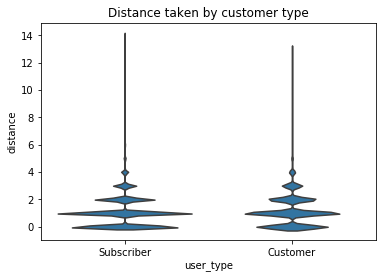

In [206]:
#Determine the value of the data and the title 
sns.violinplot(data = df_clean.query("distance <= 20"),x = 'user_type',y='distance',color = sns.color_palette()[0],inner=None).set_title('Distance taken by customer type');


Opservation:a lot of Subscriber trips a longer than customer trips.


Question:Whitch user type take a longer type? 

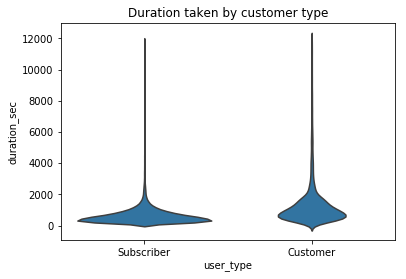

In [209]:
#Determine the value of the data and the title 
sns.violinplot(data = df_clean.query("duration_sec <= 12000"),x = 'user_type',y='duration_sec',color = sns.color_palette()[0],inner=None).set_title('Duration taken by customer type');

Opservation:a lot of Customer trips has a longer duration than customer trip.



<a id='intro'></a>
## Multivariate Exploration

Question: What are the relationship between user_type, duration and bike share option

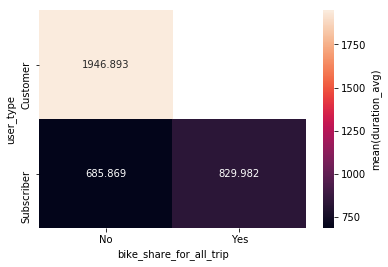

In [224]:
#Createing multivalue exploration 
cat_means = df.groupby(['bike_share_for_all_trip', 'user_type']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'bike_share_for_all_trip',
                            values = 'duration_avg')
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_avg)'});

Opservation: Customers with no bake share option took the most time 

Question: What are the relationship between day of the month, duration and bike share option

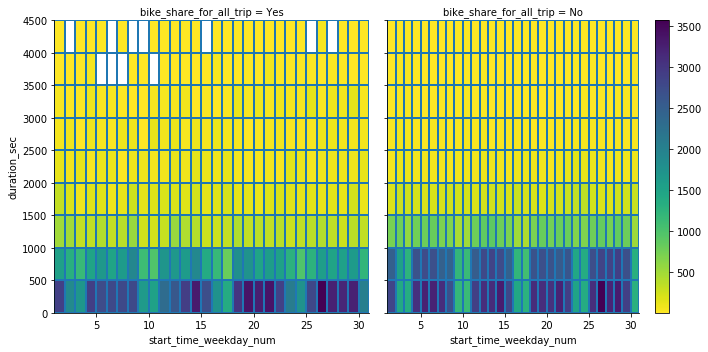

In [219]:
#Createing multivalue exploration 
xbin = np.arange(1, 32, 1)
ybin = np.arange(0, 4500, 500)
g = sns.FacetGrid(data = df_clean, col = 'bike_share_for_all_trip',height=5)
g.map(plt.hist2d, 'start_time_weekday_num','duration_sec',cmin=0.5,cmap = 'viridis_r',bins=[xbin, ybin]);
plt.colorbar();

Opservation: day 30 has the most number of trips with less than 500 second in bike option and less 1000 with no bike option 

Question: What are the relationship between start hour, duration and bike share option

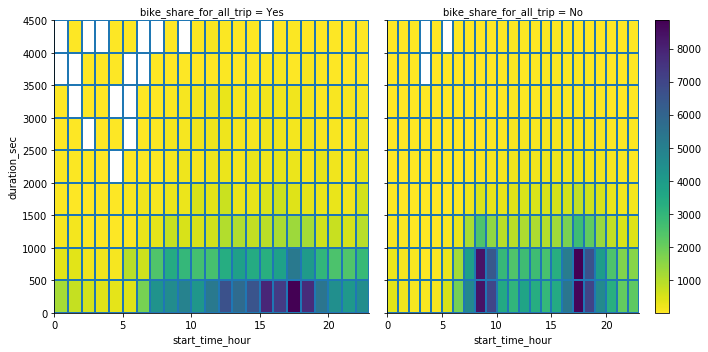

In [67]:
#Createing multivalue exploration 
xbin = np.arange(0, 24, 1)
ybin = np.arange(0, 4500, 500)
g = sns.FacetGrid(data = df_clean, col = 'bike_share_for_all_trip',height=5)
g.map(plt.hist2d, 'start_time_hour','duration_sec',cmin=0.5,cmap = 'viridis_r',bins=[xbin, ybin]);
plt.colorbar();

Opservation: day 18 has the most number of trips with less than 500 second in bike option and less 1000 with no bike option on 9 and 18  

Question: What are the relationship between start week day , duration and bike share option

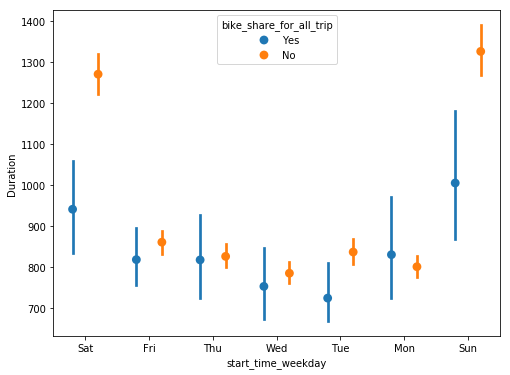

In [223]:
size = plt.figure(figsize = [8,6]);
ax = sb.pointplot(data = df_clean, x = 'start_time_weekday', y = 'duration_sec', hue = 'bike_share_for_all_trip', 
                 linestyles = '', dodge = 0.4);
plt.ylabel('Duration');
ax.set_yticklabels([],minor = True);

Opservation: On saturday and sunday there is a big duration diffrence between people with bike share option and people without 